## **CNN/ConvNet**

## The MNIST Dataset

70,000 images, 60,000 training images and 10,000 testing images.

Each image has resolution of 28x28, and numerical pixel values are in grey scale.

Each image is represented by a 28x28 matrix with each element of the matrix an integer between 0 and 255.

The label of each image is te intended digit of th handwritten image between 0 and 9. 

In [2]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.9.2'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
import tensorflow
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, plot_model
from keras import backend as K
from keras.layers import Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D
# from keras.mdels import Sequential
from keras.layers import Activation, Flatten

import random
random.seed(0)

#Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
from tensorflow.keras.datasets import mnist

#the data, shuffled an spli between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


X_train and X_test contain greyscale RGB codes (from 0 nto 255) while y_train and y_test contains labels from 0 to 9

Label: 3


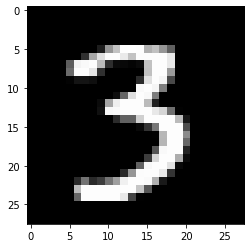

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Label: {}'.format(y_train[10000]))
plt.imshow(X_train[10000], cmap='gray')

## **Data Preprocessing** 

Print shape of data

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## **Reshape train and sets into compatible shapes**

1. Sequential model in tensorflow.keras expects data to be in the format (n_e,n_h,n_w,n_c)
2. n_e= number of examples, n_h= height, n_w= width, n_c= number of channels
3. Do not reshape labels

In [7]:
X_train.shape[0]

60000

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [9]:
X_train.shape

(60000, 28, 28, 1)

## **Normalize data**

1. we must normalize our data as it is always required in neural network models
2. we can achieve this by dividing the RGB codes with 255
3. normalize X_train and X_test
4. make sure that the values are float so that we can get decimal points after division

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [11]:
200/255

0.7843137254901961

## **Print shape of data and number of images**

1. print shape of X_train
2. print number of images in X_train
3. print number of images in X_test

In [12]:
print('X_train shape: ', X_train.shape)
print('Images in X_train: ', X_train.shape[0])
print('Images in X_train: ', X_test.shape[0])
print('Max value in X_train: ', X_train.max())
print('Min value in X_train: ', X_train.min())

X_train shape:  (60000, 28, 28, 1)
Images in X_train:  60000
Images in X_train:  10000
Max value in X_train:  1.0
Min value in X_train:  0.0


## **One-hot encode the class vector**

1. convert class vectors(integers) to binary class matrix
2. convert y_train and y_test
3. number of classes: 10
4. we are doing this to use categorical_crossentropy as loss

In [13]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,  num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print('Shape of y_train: ', y_train.shape)
print('One value of y_train',y_train[0])

Shape of y_train:  (60000, 10)
One value of y_train [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## **Building Convolutional Neural Network: ConvNet/CNN**

### Initialize a sequential  model again

- define a sequential model
- add 2 convolutional layers
  - no. of filters: 32
  - kernel size: 3x3
  - activation: 'relu'
  - input shape: (28,28,1) for first layer
- flatten the data
  - add Flatten layer
  - flatten layers flatten 2D arrays to 1D arrays before building the fully conncected layers
- add 2 dense layers
  - number of neurons in first layer: 128
  - number of neurons in last layer: number of classes
  - activation function in first layer: relu
  - activation function in last layer: softmax
  - we may experiment with any number of neurons for the first Dense layer; however the final Dense layer must have neurons equal to the number of output classes

In [14]:
from tensorflow.keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

## **Compile and fit the model**

- let's compile our model
  - loss: 'categorical_crossentropy'
  - metrics: 'accuracy'
  - optimizer: 'adam'
- then next step will be to fit the model
  - give train data - training features and labels
  - batch size: 32
  - epochs: 10
  - give validation data - testing features and labels

In [15]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
H = model.fit( x=X_train, y=y_train, batch_size=32, epochs=10, validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 17s 6ms/step - loss: 0.1416 - accuracy: 0.9569 - val_loss: 0.0675 - val_accuracy: 0.9806
Epoch 2/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0425 - accuracy: 0.9866 - val_loss: 0.0730 - val_accuracy: 0.9802
Epoch 3/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0249 - accuracy: 0.9928 - val_loss: 0.0775 - val_accuracy: 0.9790
Epoch 4/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.0847 - val_accuracy: 0.9801
Epoch 5/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0123 - accuracy: 0.9954 - val_loss: 0.0770 - val_accuracy: 0.9811
Epoch 6/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0101 - accuracy: 0.9965 - val_loss: 0.0701 - val_accuracy: 0.9858
Epoch 7/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.0683 - val_accuracy

## **Final loss and accuracy**

In [16]:
loss, acc = model.evaluate(X_test, y_test)
print('\nTest accuracy: %.1f%%' % (100.0 * acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0572 - accuracy: 0.9873

Test accuracy: 98.7%


In [17]:
loss, acc = model.evaluate(X_train,y_train)
print('\nTraining accuracy: %.1f%%' % (100.0*acc))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0273 - accuracy: 0.9947

Training accuracy: 99.5%


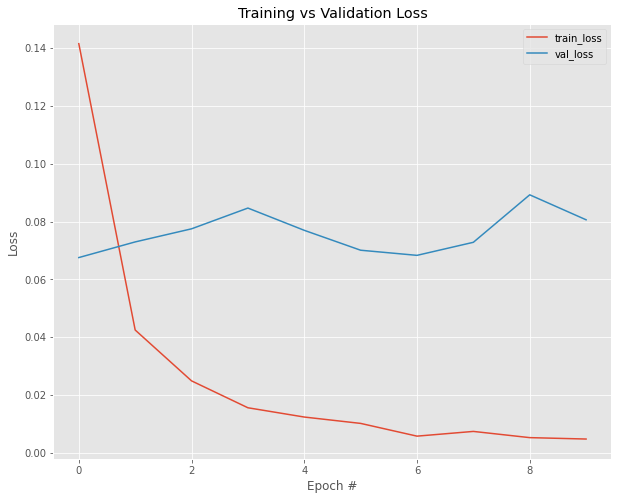

In [18]:
import matplotlib.pyplot as plt

epochs = np.arange(0, len(H.history['loss']))
plt.figure(figsize=(10,8))
plt.style.use('ggplot')

#plot training and validation loss
plt.style.use('ggplot')
plt.plot(epochs, H.history['loss'], label='train_loss')
plt.plot(epochs, H.history['val_loss'], label='val_loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

## **Vanilla CNN + Pooling + Dropout + Regularization**

## Initialize a sequential model again

- define a sequential model
- add 2 convolutional layers
  - no. of filters: 32
  - kernel size: 3x3
  - activation: 'relu'
  - input shape: (28,28,1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
  - dropout layers fight with the overfitting by disregarding some of the neurons while training
  - use dropout rate of 0.2
- flatten the data
  - add Flatten layer
  - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
  - number of neurons in the first layer: 128
  - number of neurons in the last layer: number of classes
  - activation function in the first layer: relu
  - activaton function in the last layer: softmax
  - we may experiment with any number for the first layer; however the final Dense layer must have neurons equal to the number of output classes

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D

#initialize the model
model=Sequential()

#Add a Convolutional Layer with 32 filters of size 3x3 and activation function as 'relu'
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))

#Add a Convolutional Layer with 32 filters of size 3x3 and activation function as 'relu'
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

#Add a Maxpooling Layer of size 2x2
model.add(MaxPooling2D(pool_size=(2,2)))

#Apply Dropout with 0.2 probability
model.add(Dropout(rate=0.2))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation='relu'))
#model.add(Dropout(rate=0.2))

#Add Fully connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(10, activation='softmax'))

## **Compile and fit the model**

let's compile our model
  - loss: 'catgorical_crossentropy'
  - metrics: 'accuracy'
  - optimizer: 'adam'

use EarlyStopping

then next step will be to fit the model
  - give train data - training features and labels
  - batch size: 32
  - epochs: 10
  - give validation data - testing features and labels

In [20]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1248 - accuracy: 0.9624 - val_loss: 0.0465 - val_accuracy: 0.9850
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0432 - accuracy: 0.9862 - val_loss: 0.0436 - val_accuracy: 0.9863
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0290 - accuracy: 0.9911 - val_loss: 0.0326 - val_accuracy: 0.9893


In [21]:
X_train.shape

(60000, 28, 28, 1)

In [22]:
X_test.shape

(10000, 28, 28, 1)

In [23]:
y_train.shape

(60000, 10)

In [24]:
y_test.shape

(10000, 10)

## **Final loss and accuracy**

In [34]:
loss, acc = model.evaluate(X_test, y_test)
print('\nTest accuracy: %.1f%%' % (100.0*acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0326 - accuracy: 0.9893

Test accuracy: 98.9%


In [33]:
loss, acc = model.evaluate(X_train, y_train)
print('\nTest accuracy: %.1f%%' % (100.0*acc))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0151 - accuracy: 0.9952

Test accuracy: 99.5%


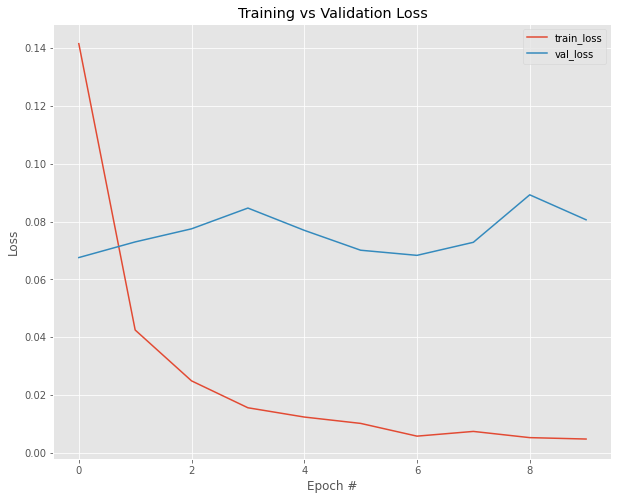

In [35]:
import matplotlib.pyplot as plt

epochs = np.arange(0, len(H.history['loss']))
plt.figure(figsize=(10,8))
plt.style.use('ggplot')

#plot training andvalidation loss
plt.style.use('ggplot')
plt.plot(epochs, H.history['loss'],label='train_loss')
plt.plot(epochs, H.history['val_loss'],label='val_loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

1/1 [==============================] - 0s 191ms/step
Predicted labels:  6
Softmax Outputs:  [[1.2590796e-07 1.3612837e-10 2.0937723e-08 4.0784176e-13 6.7265478e-09
  6.5466374e-08 9.9999976e-01 1.1942927e-09 2.5555762e-08 1.2070518e-11]]
0.99999994


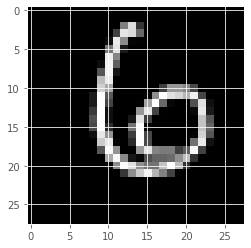

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[100].reshape(28,28),cmap='gray')
y_pred = model.predict(X_test[100].reshape(1,28,28,1))
print('Predicted labels: ',y_pred.argmax())
print('Softmax Outputs: ',y_pred)
print(y_pred.sum())

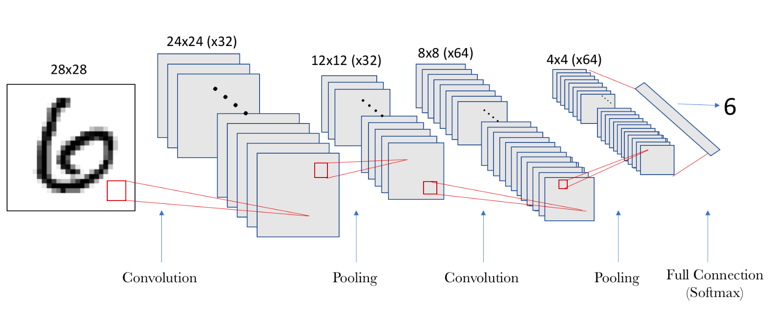